In [467]:
#Importing all dependencies

import matplotlib.image as img 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import ndimage
from PIL import Image

In [473]:
#Set location and name to your own locations

location = 'D:/P.N.I.A/Cherry Imitation'
name = 'lol.png'

In [474]:
#Loading the image as an array

image_og = img.imread(location + '/' + name)
image_og = np.asarray(image_og)
width, height = np.shape(image_og)

print(image_og)
print("\nMaximum value of the matrix's elements is", np.max(image_og) )

[[ 0.65490198  0.65490198  0.65490198 ...,  0.65490198  0.65490198
   0.65490198]
 [ 0.74509805  0.65490198  0.65490198 ...,  0.65490198  0.65490198
   0.26274511]
 [ 0.74509805  0.74509805  1.         ...,  1.          0.26274511
   0.26274511]
 ..., 
 [ 0.74509805  0.74509805  1.         ...,  1.          0.26274511
   0.26274511]
 [ 0.74509805  0.21568628  0.21568628 ...,  0.21568628  0.21568628
   0.26274511]
 [ 0.21568628  0.21568628  0.21568628 ...,  0.21568628  0.21568628
   0.21568628]]

Maximum value of the matrix's elements is 1.0


Maximum value of the matrix's elements is now 255.0


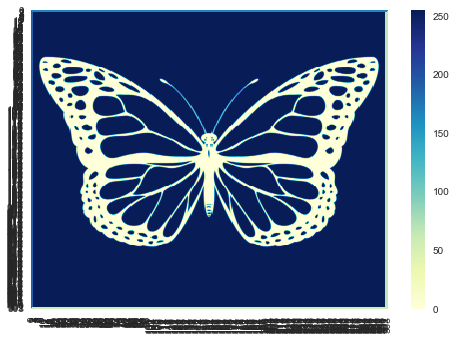

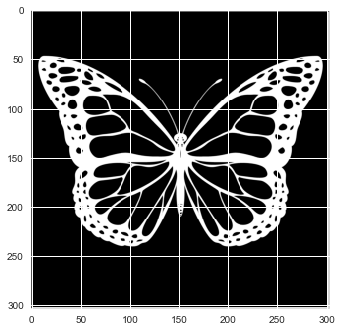

In [475]:
#The maximum pixel value is 1. We convert it to maximum 255 type format. (8 bit colour)

image_og = image_og * 255
print("Maximum value of the matrix's elements is now", np.amax(image_og) )

sns.heatmap(image_og,cmap="YlGnBu", fmt="d")
plt.show()
plt.imshow(image_og)
plt.show()

In [480]:
#Lanczos resizing

order = 2
decimation_factor = 5
lanczos = []

for _ in range(-1*(order*decimation_factor), (order*decimation_factor)+1):
    __ = _/decimation_factor
    temp = np.sinc(np.pi*__)*np.sinc((np.pi*__)/order)
    lanczos.append(temp)
lanczos

[-0.0017158608210115145,
 -0.0028902750901135549,
 -0.00066756703062088483,
 0.0058229107791647342,
 0.0033352666442263788,
 0.0086173070902384966,
 -0.023132735933110812,
 -0.0036246483126181829,
 -0.085187701352581177,
 0.39394284223262316,
 1.0,
 0.39394284223262316,
 -0.085187701352581177,
 -0.0036246483126181829,
 -0.023132735933110812,
 0.0086173070902384966,
 0.0033352666442263788,
 0.0058229107791647342,
 -0.00066756703062088483,
 -0.0028902750901135549,
 -0.0017158608210115145]

In [481]:
temp = []
image_new = []

#Convoluting the Lanczos' 1D kernel over the rows
for _ in range(width):
    temp.append(np.convolve(image_og[_], lanczos, 'same'))

    
#Convoluting the Lanczos' 1D kernel over the columns
temp = np.transpose(temp)
for _ in range(height):
    image_new.append(np.convolve(temp[_], lanczos, 'same'))
    
    
image_new = np.transpose(image_new)

In [482]:
np.shape(image_new)

(304, 304)

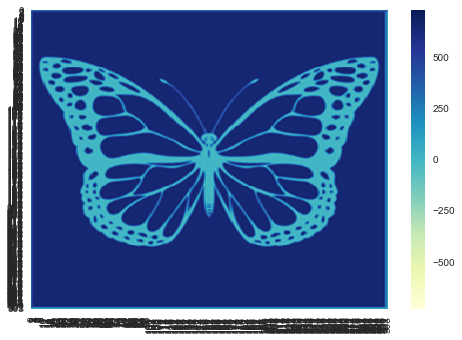

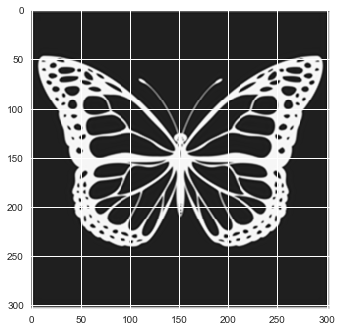

In [483]:
sns.heatmap(image_new,cmap="YlGnBu", fmt="d")
plt.show()
plt.imshow(image_new)
plt.show()

In [484]:
temp = [0]
temp = np.tile(temp, decimation_factor-1)
temp = np.append([1],temp)
print(temp)

mask = np.array(temp)
mask = np.tile(mask, int(np.floor(((height))/decimation_factor)))
mask = np.append(mask,temp[:(height%decimation_factor)])
np.shape(mask)

[1 0 0 0 0]


(304,)

In [485]:
lol = np.ones((width,height))
lol = np.multiply(lol, mask)
lol = np.transpose(lol)
lol = np.multiply(lol, mask)
lol = np.transpose(lol)
lol

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [486]:
image_new = lol*image_new
image_new

array([[ 286.5894464,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       ..., 
       [   0.       ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ],
       [   0.       ,    0.       ,    0.       , ...,    0.       ,
           0.       ,    0.       ]])

In [510]:
image_resize = []
for _ in range(width):
    if _%decimation_factor == 0:
        temp = []
        for __ in range(height):
            if __%decimation_factor == 0:
                temp.append(image_new[_,__])
        image_resize.append(temp)
image_resize = np.asarray(image_resize)
image_resize = image_resize + np.absolute(np.amin(image_resize)) # Making it all positive array
image_resize = image_resize / np.amax(image_resize)
image_resize = image_resize * 255
np.shape(image_resize)

(61, 61)

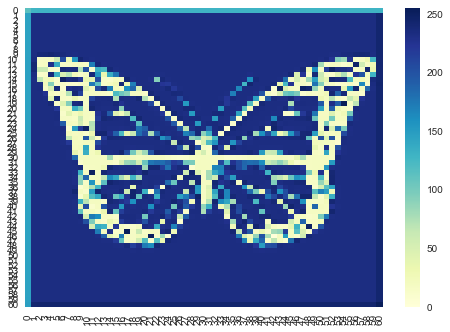

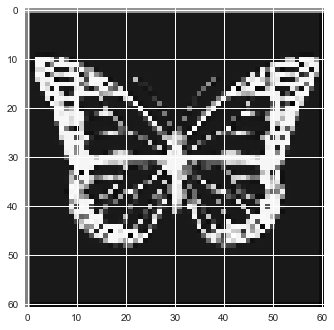

In [511]:
sns.heatmap(image_resize, cmap="YlGnBu", fmt="d")
plt.show()
plt.imshow(image_resize)
plt.show()

In [512]:
#Binarize the image using Otsu's 
binarize = True
threshold = 130

np.histogram(image_resize)

(array([ 363,   87,   62,   54,   47,  176,   55,   64,  100, 2713], dtype=int64),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

Filter is: 

 [[ 0.0625  0.125   0.0625]
 [ 0.125   0.25    0.125 ]
 [ 0.0625  0.125   0.0625]]


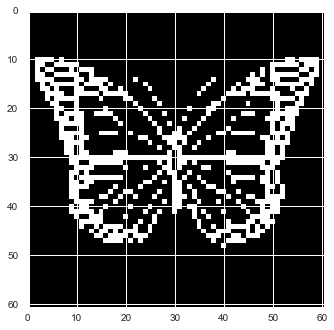

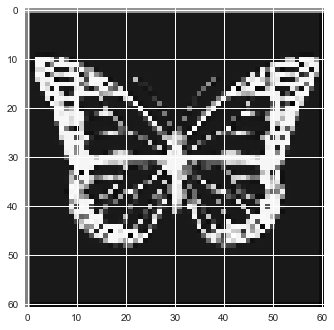

In [513]:
#Binarize using Binomial filtering
binomial_order = 2
thresh = 6

b = [0.5, 0.5]
temp = b
for _ in range(binomial_order - 1):
    temp = np.convolve(temp, b)
binom_filter = np.outer(np.transpose(temp), temp)
print('Filter is: \n\n',binom_filter)
binom_filter = np.pad(binom_filter, (int((len(image_resize)-len(binom_filter))/2),int((len(image_resize)-len(binom_filter))/2)), 'constant')
temp = ndimage.convolve(image_resize, binom_filter)

temp = temp - image_resize

for _ in range(list(np.shape(temp))[0]):
    for __ in range(list(np.shape(temp))[1]):
        if temp[_][__] < thresh:
            temp[_][__] = 255
        else:
            temp[_][__] = 0

plt.imshow(temp)
plt.show()


plt.imshow(image_resize)
plt.show()

In [514]:
image_resize = temp

In [515]:
np.shape(temp)

(61, 61)

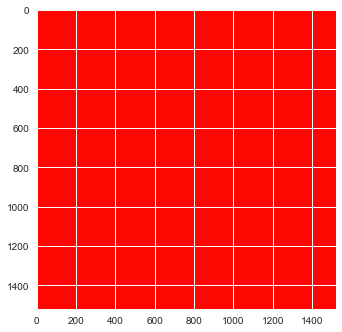

In [516]:
mag_factor = 5

cover = np.zeros((width*mag_factor , height*mag_factor, 3), np.uint8)
cover[:][:] = (252,7,2)
plt.imshow(cover)
plt.show()

In [517]:
factor = mag_factor * decimation_factor
low = int(np.floor((factor-1)/2))
high = int(np.ceil((factor-1)/2))



In [530]:
circle = [[(252,7,2)]]

circle.append([(255,255,255)])

circle.append([[(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255)]])

circle.append([[(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )]])

circle.append([[(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )]])

circle.append([[(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )]])

circle.append([[(0  ,0  ,0  ),(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  ),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255)],
               [(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  )],
               [(0  ,0  ,0  ),(0  ,0  ,0  ),(0  ,0  ,0  ),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(255,255,255),(0  ,0  ,0  ),(0  ,0  ,0  ),(0  ,0  ,0  )]])


def order_generator(bit, minimum = factor/5, maximum = factor/3):
    order = np.floor(minimum + ((maximum-minimum)*(bit/255)))
    if (order%2==0):
        return (order+1)
    else:
        return order

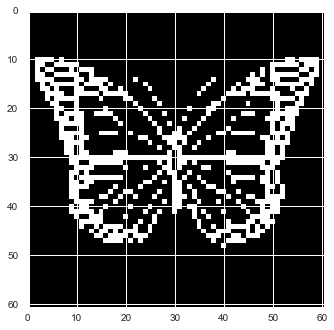

9.0


In [531]:
orders = []

w, h = np.shape(image_resize)
for _ in range(w):
    temp = []
    for __ in range(h):
        temp.append(order_generator(image_resize[_,__]))
    orders.append(temp)

plt.imshow(orders)
plt.show()
print(max(max(orders)))

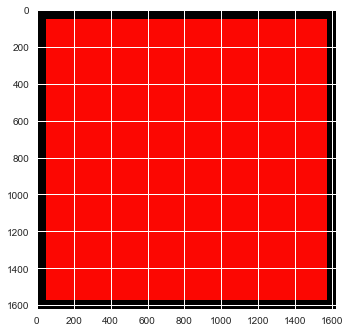

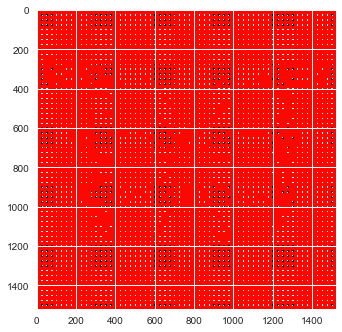

In [532]:
lol = 50 #padding width on each edge

cover_pad = np.zeros((width*mag_factor + (2*lol) , height*mag_factor + (2*lol), 3), np.uint8)
cover_pad[lol:(-1*lol),lol:(-1*lol)] = (252,7,2)

plt.imshow(cover_pad)
plt.show()

w, h = np.shape(image_resize)
for _ in range(w):
    for __ in range(h):
        temp = orders[_][__]
        temp = (temp-1) / 2
        temp = int(temp)
        low_w  = (lol - int((len(circle[temp])-1)/2) + (_*factor))
        high_w = (lol + int((len(circle[temp])-1)/2) + (_*factor) + 1)
        low_h  = (lol - int((len(circle[temp])-1)/2) + (__*factor))
        high_h = (lol + int((len(circle[temp])-1)/2) + (__*factor) + 1)
        
        cover_pad[low_w:high_w, low_h:high_h] = circle[temp]

        cover = cover_pad[lol:(-1*lol),lol:(-1*lol)]

plt.imshow(cover)
plt.savefig(location + '/' + 'cherry-ized.png')
plt.savefig(location + '/' + 'cherry-ized.pdf')
plt.show()

im = Image.fromarray(cover)
im.save(location + '/' + 'cherry-ized.jpeg')

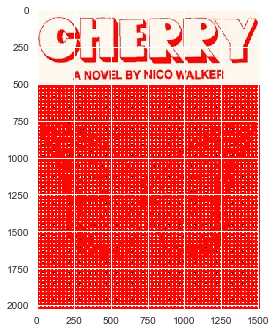

In [499]:
#Loading the image as an array

final = img.imread(location + '/' + 'final.png')
final = np.asarray(image_og)

plt.imshow(final)
plt.show()

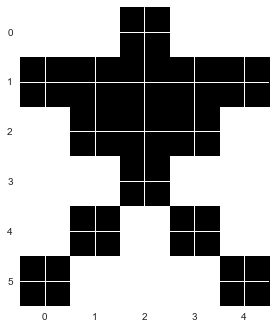

In [497]:
umm = [[0  , 0  , 255, 0  , 0  ],
 [255, 255, 255, 255, 255],
 [0  , 255, 255, 255, 0  ],
 [0  , 0  , 255, 0  , 0  ],
 [0  , 255, 0  , 255, 0  ],
 [255, 0  , 0  , 0  , 255]]

plt.imshow(umm)
plt.show()